# Projeto 1: Fase de Data Understanding (CRISP-DM)

**Objetivo:** Explorar o dataset "Screen Time vs Mental Wellness" para compreender as suas características, qualidade e encontrar primeiros *insights*.

## 0. Importar Bibliotecas


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")
%matplotlib inline

## 1. Recolha Inicial dos Dados

Carregamos o dataset 'ScreenTime vs MentalWellness.csv' para um DataFrame do pandas.

In [ ]:
# Carregar o dataset
try:
    df = pd.read_csv('/home/lucasserralha/Documents/Mestrado UMinho/AASE-2025/projeto_1/assets/ScreenTime vs MentalWellness.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Ficheiro 'ScreenTime vs MentalWellness.csv' não encontrado.")

# Visualizar as primeiras 5 linhas para confirmar o carregamento
if 'df' in locals():
    df.head()

Dataset carregado com sucesso!


user_id  age  gender occupation  work_mode  screen_time_hours  \
0   U0001   33  Female   Employed     Remote              10.79   
1   U0002   28  Female   Employed  In-person               7.40   
2   U0003   35  Female   Employed     Hybrid               9.78   
3   U0004   42    Male   Employed     Hybrid              11.13   
4   U0005   28    Male    Student     Remote              13.22   

   work_screen_hours  leisure_screen_hours  sleep_hours  sleep_quality_1_5  \
0               5.44                  5.35         6.63                  1   
1               0.37                  7.03         8.05                  3   
2               1.09                  8.69         6.48                  1   
3               0.56                 10.57         6.89                  1   
4               4.09                  9.13         5.79                  1   

   stress_level_0_10  productivity_0_100  exercise_minutes_per_week  \
0                9.3                44.7                        127   
1                5.7                78.0                         74   
2                9.1                51.8                         67   
3               10.0                37.0                          0   
4               10.0                38.5                        143   

   social_hours_per_week  mental_wellness_index_0_100  
0                    0.7                          9.3  
1                    2.1                         56.2  
2                    8.0                          3.6  
3                    5.7                          0.0  
4                   10.1                          0.0

## 2. Descrição dos Dados

In [ ]:
if 'df' in locals():
    print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
    
    print("\n--- Informação das Colunas ---")
    df.info()

O dataset tem 400 linhas e 15 colunas.

--- Informação das Colunas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercis

**Observações Iniciais:**
- Temos colunas numéricas (como `age`, `screen_time_hours`, `stress_level_0_10`) e categóricas (`gender`, `occupation`, `work_mode`).
- A coluna `user_id` parece ser um identificador único, provavelmente não será útil para a modelação, mas sim para identificar utilizadores.
- Os nossos alvos (targets) principais, `sleep_quality_1_5` e `stress_level_0_10`, são numéricos (um ordinal e um contínuo/discreto).

## 3. Verificação da Qualidade dos Dados

Procuramos por problemas comuns que podem afetar a análise, como dados em falta (nulos/NaN) ou linhas duplicadas.

In [16]:
if 'df' in locals():
    # Verificar valores em falta (missing values)
    print("--- Valores em Falta por Coluna ---")
    print(df.isnull().sum())
    
    # Verificar linhas duplicadas
    print("\n--- Linhas Duplicadas ---")
    print(f"Número de linhas duplicadas: {df.duplicated().sum()}")

--- Valores em Falta por Coluna ---
user_id                        0
age                            0
gender                         0
occupation                     0
work_mode                      0
screen_time_hours              0
work_screen_hours              0
leisure_screen_hours           0
sleep_hours                    0
sleep_quality_1_5              0
stress_level_0_10              0
productivity_0_100             0
exercise_minutes_per_week      0
social_hours_per_week          0
mental_wellness_index_0_100    0
dtype: int64

--- Linhas Duplicadas ---
Número de linhas duplicadas: 0


**Observações da Qualidade:**
- *[Completar após execução]* Se houver 0 valores em falta e 0 duplicados, o dataset está limpo nesse aspeto. Se não, teremos de tratar disto na fase de *Data Preparation*.

## 4. Exploração dos Dados (EDA)

Vamos agora analisar as variáveis individualmente (Análise Univariada) e as suas relações (Análise Multivariada).

### 4.1 Análise Univariada - Variáveis Numéricas

Começamos por ver as estatísticas descritivas (média, mediana, min, max, etc.) e a distribuição (histogramas) das variáveis numéricas.

--- Estatísticas Descritivas (Numéricas) ---


age  screen_time_hours  work_screen_hours  leisure_screen_hours  \
count  400.00000         400.000000         400.000000            400.000000   
mean    29.77750           9.024900           2.183075              6.841825   
std      7.46608           2.491058           1.931321              2.220896   
min     16.00000           1.000000           0.110000              0.890000   
25%     24.00000           7.372500           0.695000              5.460000   
50%     30.00000           9.090000           1.455000              6.700000   
75%     35.00000          10.495000           3.012500              8.417500   
max     60.00000          19.170000          12.040000             13.350000   

       sleep_hours  sleep_quality_1_5  stress_level_0_10  productivity_0_100  \
count   400.000000         400.000000         400.000000          400.000000   
mean      7.013175           1.397500           8.150500           54.306500   
std       0.852421           0.652348           2.094844           15.020054   
min       4.640000           1.000000           0.000000           20.600000   
25%       6.397500           1.000000           6.900000           43.600000   
50%       7.030000           1.000000           8.800000           51.750000   
75%       7.640000           2.000000          10.000000           63.000000   
max       9.740000           4.000000          10.000000          100.000000   

       exercise_minutes_per_week  social_hours_per_week  \
count                 400.000000             400.000000   
mean                  109.810000               7.905000   
std                    70.007045               4.909632   
min                     0.000000               0.000000   
25%                    58.000000               4.575000   
50%                   103.000000               7.750000   
75%                   157.000000              11.025000   
max                   372.000000              23.900000   

       mental_wellness_index_0_100  
count                   400.000000  
mean                     20.326750  
std                      20.376793  
min                       0.000000  
25%                       3.675000  
50%                      14.800000  
75%                      30.650000  
max                      97.000000

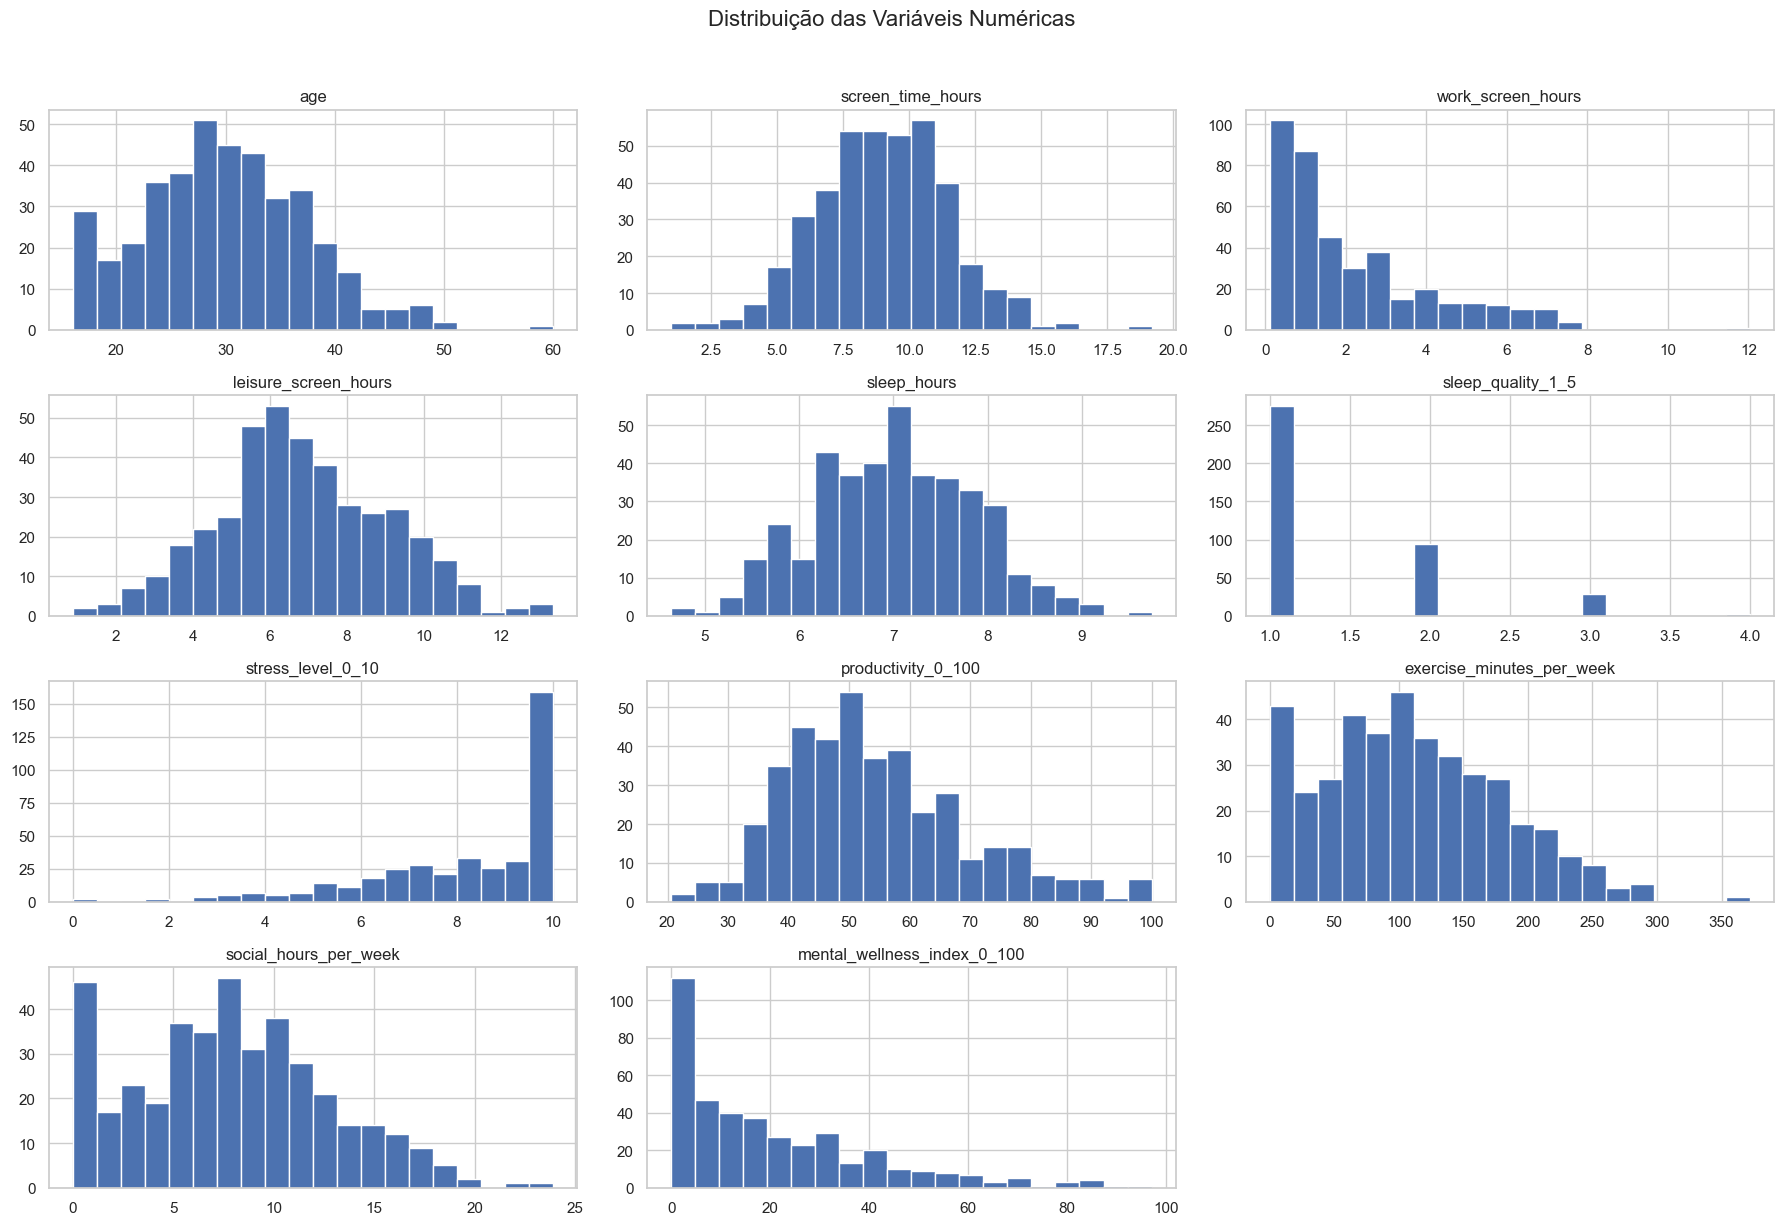

In [17]:
if 'df' in locals():
    # Estatísticas descritivas para colunas numéricas
    print("--- Estatísticas Descritivas (Numéricas) ---")
    # Usamos 'include='number'' para pegar apenas colunas numéricas
    display(df.describe(include='number'))
    
    # Plotar histogramas para todas as variáveis numéricas
    # Excluímos 'user_id' que não é relevante para distribuição
    numerical_cols = df.select_dtypes(include='number').columns
    
    # O 'user_id' não é uma variável, é um identificador. Vamos removê-lo se existir.
    if 'user_id' in numerical_cols:
        numerical_cols = numerical_cols.drop('user_id')
        
    df[numerical_cols].hist(bins=20, figsize=(18, 12), layout=(-1, 3))
    plt.suptitle("Distribuição das Variáveis Numéricas", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

**Observações (Histogramas):**
- `age`: Parece ter uma distribuição... *[Completar: ex: normal, assimétrica à direita, bimodal?]*
- `screen_time_hours`: ...
- `stress_level_0_10`: Parece concentrado em valores altos... *[Isto é um insight!]*
- `sleep_quality_1_5`: Parece ter muitos valores em '1' (baixa qualidade)... *[Outro insight!]*

### 4.2 Análise Univariada - Variáveis Categóricas

Agora, vemos a contagem de cada categoria para as variáveis não-numéricas.

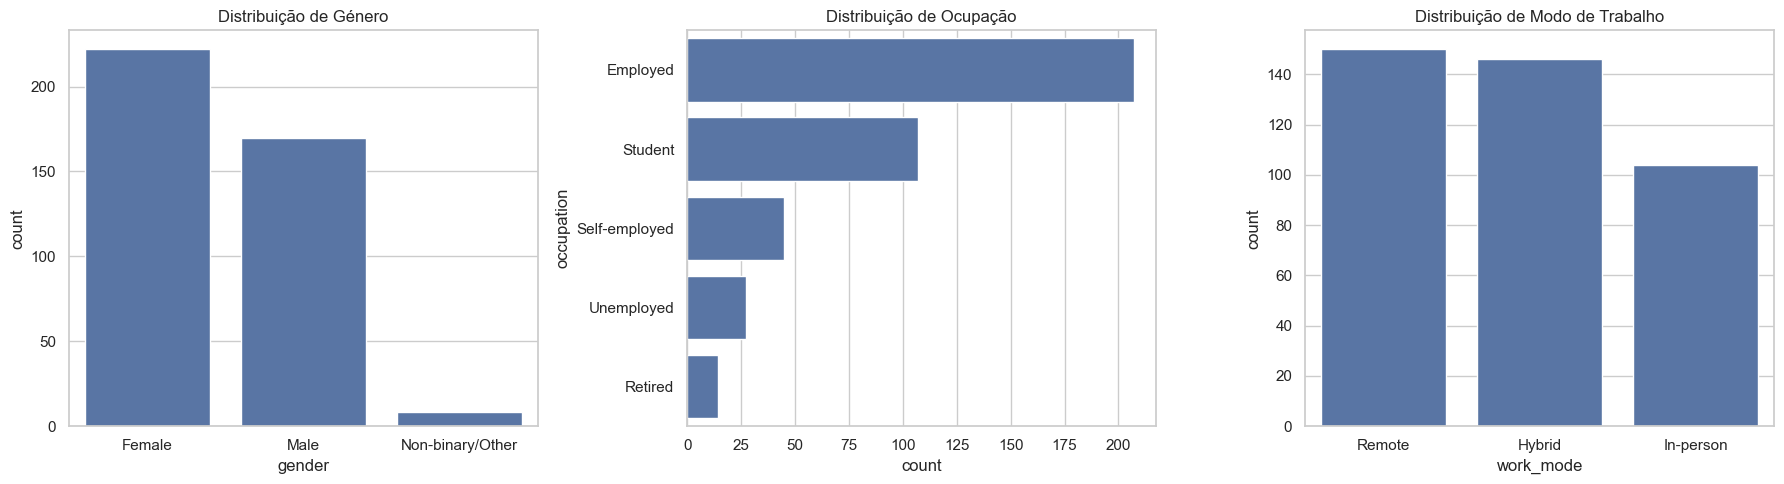

In [18]:
if 'df' in locals():
    categorical_cols = ['gender', 'occupation', 'work_mode']
    
    plt.figure(figsize=(18, 5))
    
    # Gráfico para 'gender'
    plt.subplot(1, 3, 1)
    sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index)
    plt.title('Distribuição de Género')
    
    # Gráfico para 'occupation'
    plt.subplot(1, 3, 2)
    sns.countplot(data=df, y='occupation', order=df['occupation'].value_counts().index) # Eixo Y para melhor leitura
    plt.title('Distribuição de Ocupação')
    
    # Gráfico para 'work_mode'
    plt.subplot(1, 3, 3)
    sns.countplot(data=df, x='work_mode', order=df['work_mode'].value_counts().index)
    plt.title('Distribuição de Modo de Trabalho')
    
    plt.tight_layout()
    plt.show()

**Observações (Categóricas):**
- A amostra é equilibrada em termos de género? *[Completar]*
- Qual é a ocupação mais comum? *[Completar]*
- Qual o modo de trabalho dominante? *[Completar]*

### 4.3 Análise Multivariada

Aqui procuramos relações *entre* as variáveis. A Matriz de Correlação é um ótimo ponto de partida para as variáveis numéricas.

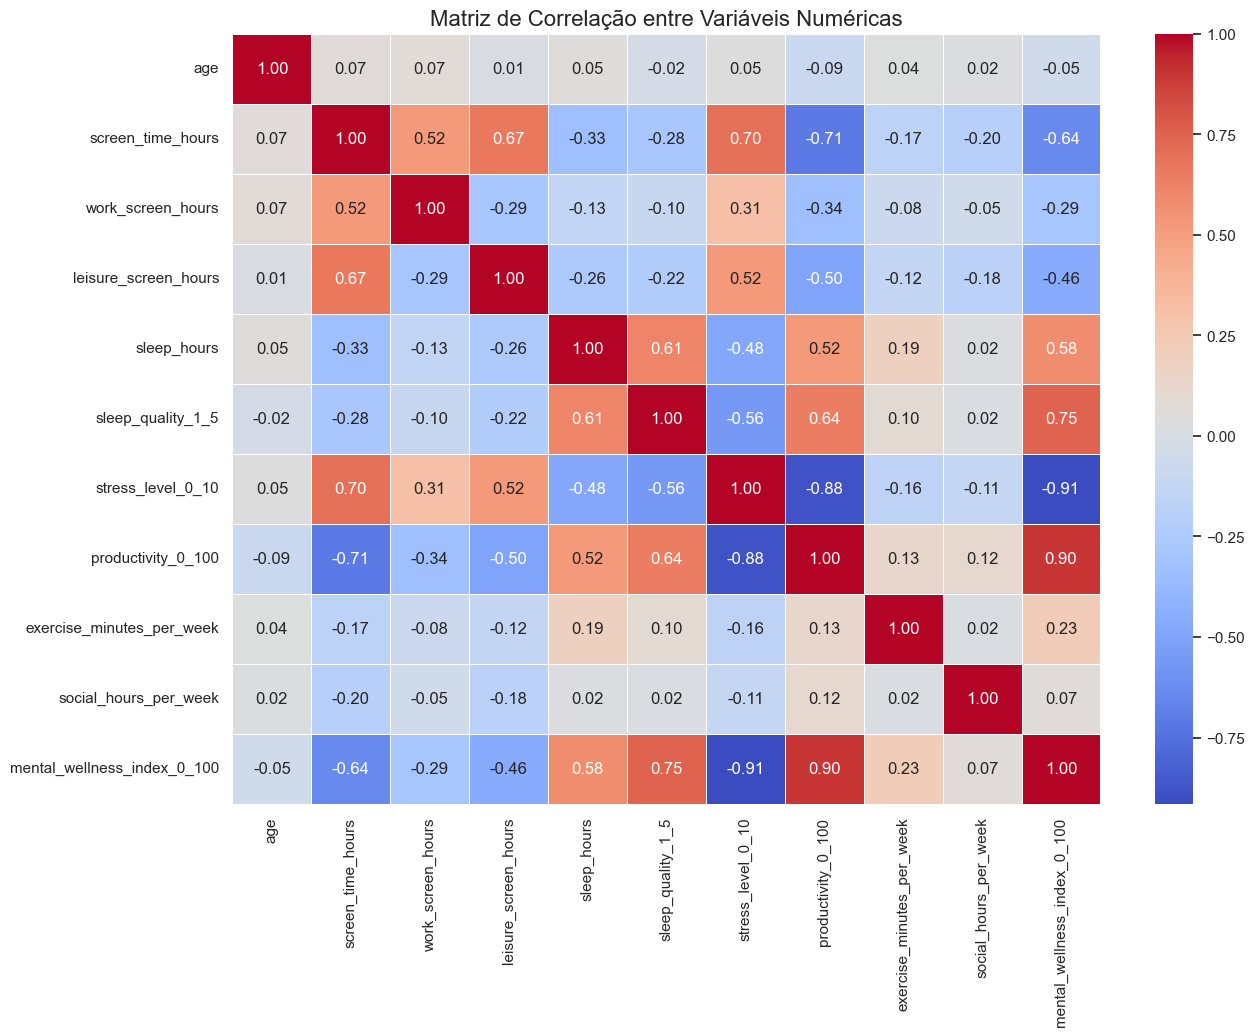

In [19]:
if 'df' in locals():
    # Calcular a matriz de correlação (apenas para colunas numéricas)
    corr_matrix = df[numerical_cols].corr()
    
    # Plotar o heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
    plt.show()

**Observações (Correlação):**
- **`stress_level_0_10`**: Tem uma correlação positiva forte com `screen_time_hours`? E com `work_screen_hours`?
- **`sleep_quality_1_5`**: Tem uma correlação negativa com `screen_time_hours`? (Mais tempo de ecrã, menor qualidade de sono).
- **`mental_wellness_index_0_100`**: Como se correlaciona com o stress (negativamente?) e qualidade do sono (positivamente?)

### 4.4 Análise Focada nos Alvos (Stress e Qualidade do Sono)

Vamos aprofundar a relação entre o tempo de ecrã e os nossos dois principais alvos.

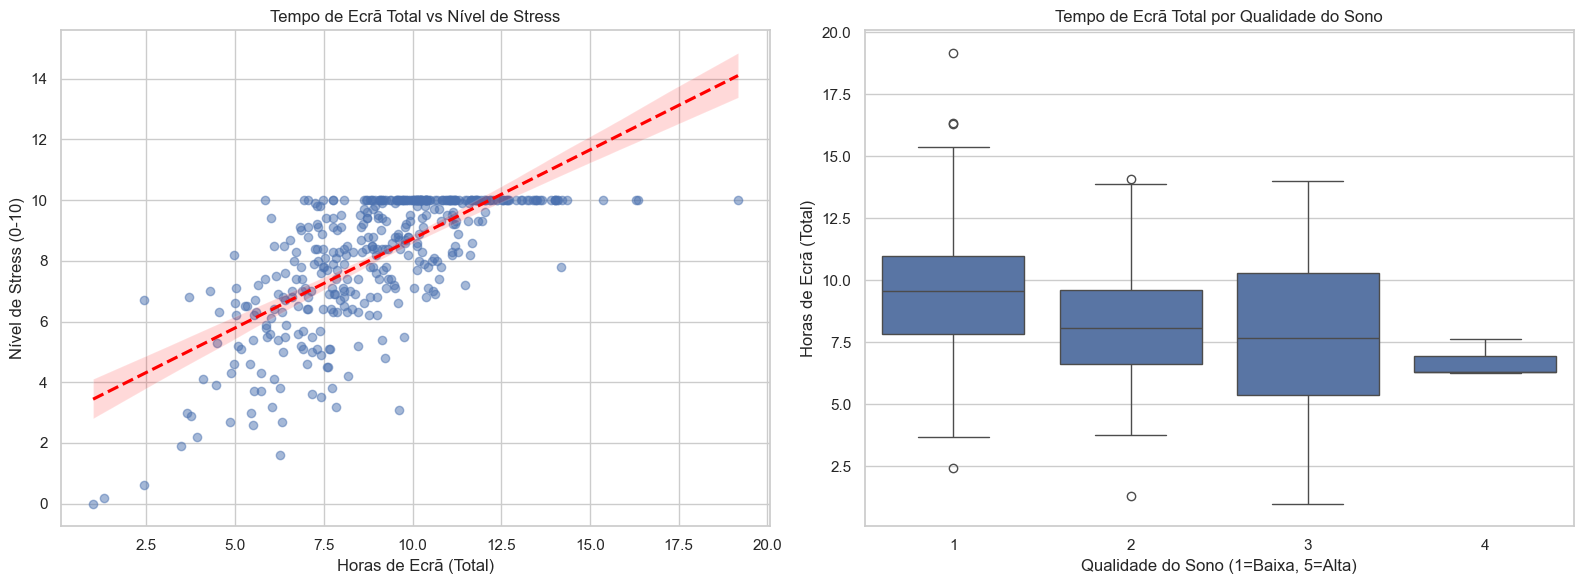

In [20]:
if 'df' in locals():
    plt.figure(figsize=(16, 6))
    
    # Alvo 1: Tempo de Ecrã vs Nível de Stress
    plt.subplot(1, 2, 1)
    sns.regplot(data=df, x='screen_time_hours', y='stress_level_0_10', 
                line_kws={'color': 'red', 'linestyle': '--'}, 
                scatter_kws={'alpha': 0.5})
    plt.title('Tempo de Ecrã Total vs Nível de Stress')
    plt.xlabel('Horas de Ecrã (Total)')
    plt.ylabel('Nível de Stress (0-10)')
    
    # Alvo 2: Tempo de Ecrã vs Qualidade do Sono
    # Como 'sleep_quality' é ordinal (1-5), um boxplot ou violinplot é mais adequado
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='sleep_quality_1_5', y='screen_time_hours')
    plt.title('Tempo de Ecrã Total por Qualidade do Sono')
    plt.xlabel('Qualidade do Sono (1=Baixa, 5=Alta)')
    plt.ylabel('Horas de Ecrã (Total)')
    
    plt.tight_layout()
    plt.show()

**Observações (Alvos):**
- O `regplot` (gráfico 1) mostra uma linha de tendência. É ascendente? (Mais ecrã, mais stress).
- O `boxplot` (gráfico 2) mostra a distribuição. A mediana do tempo de ecrã é mais alta para pessoas com qualidade de sono '1'?

In [21]:
if 'df' in locals():
    # Vamos analisar o stress por Ocupação
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='stress_level_0_10', y='occupation')
    plt.title('Nível de Stress por Ocupação')
    plt.xlabel('Nível de Stress (0-10)')
    plt.ylabel('Ocupação')
    plt.show()

**Observações (Ocupação):**
- Existem ocupações visivelmente mais stressadas que outras?

## 5. Relatório Sumário da Exploração

*(Esta secção seria o "Data Exploration Report" do CRISP-DM)*

1.  **Qualidade dos Dados:** O dataset apresenta-se [limpo / com alguns problemas], [sem / com] valores omissos e [sem / com] duplicados.
2.  **Distribuições:** 
    - A maioria dos participantes reporta níveis de stress [altos / baixos / médios] e qualidade de sono [baixa / alta].
    - A ocupação mais frequente é [Ocupação] e o modo de trabalho é [Modo].
3.  **Principais Relações (Hipóteses Iniciais):**
    - Foi encontrada uma correlação [positiva/negativa] e [fraca/moderada/forte] entre `screen_time_hours` e `stress_level_0_10` (Valor: [cor_valor]).
    - Foi encontrada uma correlação [positiva/negativa] e [fraca/moderada/forte] entre `screen_time_hours` e `sleep_quality_1_5` (Valor: [cor_valor]).
    - A variável `mental_wellness_index_0_100` parece ser fortemente influenciada por [variável] e [variável].

**Próximos Passos (Data Preparation):**
- Tratar os outliers identificados em [coluna] (se houver).
- Transformar variáveis categóricas (`gender`, `occupation`, `work_mode`) em numéricas (ex: One-Hot Encoding) para os modelos de machine learning.
- Selecionar as *features* (variáveis) mais relevantes para a modelação (`Feature Selection`).
- Normalizar/Standardizar os dados, se os modelos a utilizar o exigirem (ex: SVM, Redes Neuronais).